# Report 5: Cellular Automata

## Jillian Annis

### Introduction

A cellular automaton is a self-contained universe where its space is divided into a grid of cells, and has its own "laws of physics".  Each cell in the grid has its own state and a set of neighbors.  Time in this universe is a discrete set of steps.  At each step of time, a transition rule updates the state of every cell based on the current state of the cell and its neighbors.  

The concept of cellular automata was discovered in the 1940s by John von Neumann and Stanislaw Ulam (who also discovered the prime spiral).  However, it wasn't until the 1970s when the cellular automaton the "Game of Life" was created by John Conway that interest in cellular automata grew.  Today, cellular automata are normally used to model large, complex physical systems in areas such as theoretical biology, microstructure modeling, and computer processors.

### Task Statement

In this report, the goal is to implement the cellular automaton that was defined in class and explore all the possible behaviors that different transition rules can lead to.  The cellular automaton has the following characteristics:
* A one dimensional grid with each cell having just two neighbors, one on each side.
* There are four possible cell states: 1, 2, 3, 4.  Each state is represented by a different color.
* There are periodic edge conditions; the rightmost and leftmost cells are neighbors.
* The transition rule is that the state of each cell is updated based on the sum of the current cell state and those of its neighbors. 

### Methods

In [1]:
%pylab inline
from numpy.random import randint

Populating the interactive namespace from numpy and matplotlib


In [9]:
def CellAuto():
    nGen=25
    nCells=25
    
    nrow=3
    ncol=3
    
    Colors=array([[1,0,0], [0,1,1], [.5,0,1], [1,1,0]], dtype=float) #red, cyan, purple, yellow
    
    figure(figsize=(15,15))
    
    for j in range(1,nrow*ncol+1):
    
        CellState=empty((nGen, nCells),dtype=int)
        CellState[0]=randint(4, size=nCells)
        Rule=randint(4,size=10)

        for i in range(1,nGen):
            SumCells=CellState[i-1]+roll(CellState[i-1],-1)+roll(CellState[i-1],1)
            CellState[i]=Rule[SumCells]
    
        CellColor=Colors[CellState]
    
        subplot(nrow,ncol,j)
        imshow(CellColor, interpolation='none')
        xticks([])
        yticks([])
        title(j, fontsize='12')
        xlabel(Rule, fontsize='12');

The function **CellAuto()** is used to generate multiple plots of cellular automata all at once.  First, some variables are defined:  

* **nGen** is the number of generations the function will apply the transition rule to.  It is also the number of rows.
* **nCells** is the number of cells present within this cellular automaton.  It is also the number of columns.
* **nrow** is the number of rows in the subplot.
* **ncol** is the number of columns in the subplot.
* **Colors** is an array of shape (4,3) that contains the colors to be used in the images.  From left to right, the colors are: red, cyan, purple, and yellow.
* **figure** is not a variable, but it is used to define the figure size that will be used to hold all the subplotted images.

In this function, **nGen** and **nCells** are both 25.  This means that there will be 25 generations, and each generation will have 25 cells.  **nrow** and **ncol** are both set to 3, and this means that the subplot will be broken up into a grid of 3 rows and 3 columns, so there will be 9 images total with 3 images per row.  As stated, **Colors** is the array that holds the colors to be used.  The keyword argument *dtype* is used to set the data type in the array to be floats.  Lastly, a figure size of 15 by 15 will be used to subplot the images. (Note: The reason nGen and nCells are 25 is that my computer doesn't really like to run anything larger than this for some reason.  When I ran 50 it blue screened.  Luckily, it is enough to see the end behaviors.)

Next is a *for loop* that runs from range 1 up to (but not including) **nrow x ncol +1**, or 10.  This *for loop* is used to plot different cellular automata in a 3 by 3 grid, thus all code that creates the automata must be put within it.

First, the **CellState** array must be created.  This is an initially empty integer array that is the size **nGen** by **nCells**, or 25 by 25.  We then set the first row (index 0) of this array as a row of random integers ranging from 0 to 3.  By doing this, every time the *for loop* begins again, the initial generation of cell states is randomly set.  After that, the transition rule, **Rule**, is generated.  The rule is also an array of random integers from 0 to 3, but *size=10* means that it only contains 10 numbers.

Another *for loop* is used to apply the transition rule to the intitial or current cell states, and it runs from 1 to **nGen**.  The reason it starts at 1 and not 0 is because we are generating the next, or ith, generation of cell states.  We already defined what state 0 is, so we do not want to overwrite it.  In this cellular automata, the transition rule is applied to the sum of a cell and its neighbors to the right and left.  To obtain the sum of the current cell states (the **SumCells** array), we use the *roll* function to shift the array elements by 1 to the left or right.  When using *roll*, we shift the ith-1 generation, since this the generation right before the one we are trying to compute.  Also, since the loop range must start at 1, i-1 allows for the initial generation to be used.  Then, to get the next generation of cell states, we use array indexing to apply the transition rule to the **SumCells** array.  The array indexing does this by replacing values in the **SumCells** array with values in the **Rule** array based on the index in the **Rule** array.  For example, let's say one of the values in **SumCells** is 4.  This number will be replaced by whatever number is indexed 4 in **Rule** (which would be the 5th number because indexing starts at 0).  When the transition rule is done being applied, the new array of number becomes the ith generation in **CellStates**.

The rest of the code is outside the 2nd *for loop*, but still inside the 1st.

Now that we have generated all 25 generations, we must apply a color to each individual cell state.  We once again use array indexing to replace the values in **CellStates** with the colors defined in the **Colors** array, and we call this new array **CellColor**.  The following values are replaced with these colors:
* A state of 0 is replaced with the color red.
* A state of 1 is replaced with the color cyan.
* A state of 2 is replaced with the color purple.
* A state of 3 is replaced with the color yellow.

Finally, now that we have an array of only colors, we can plot the image.  First, *subplot* is called, and the 3 by 3 grid is created.  As the first loop runs, each image will be subplotted in the jth position in the grid.  Next, *imshow* is called, and this is what displays the color array **CellColor**.  The keyword argument *interpolation='none'* is used to prevent the colors from blurring into one another.  The x- and y-axis tick marks are turned off, and each image is given a number, j, to identify it (this is also its position number in the grid).  Additionally, the transition rule is put below each image by making it the x-axis label.

### Results

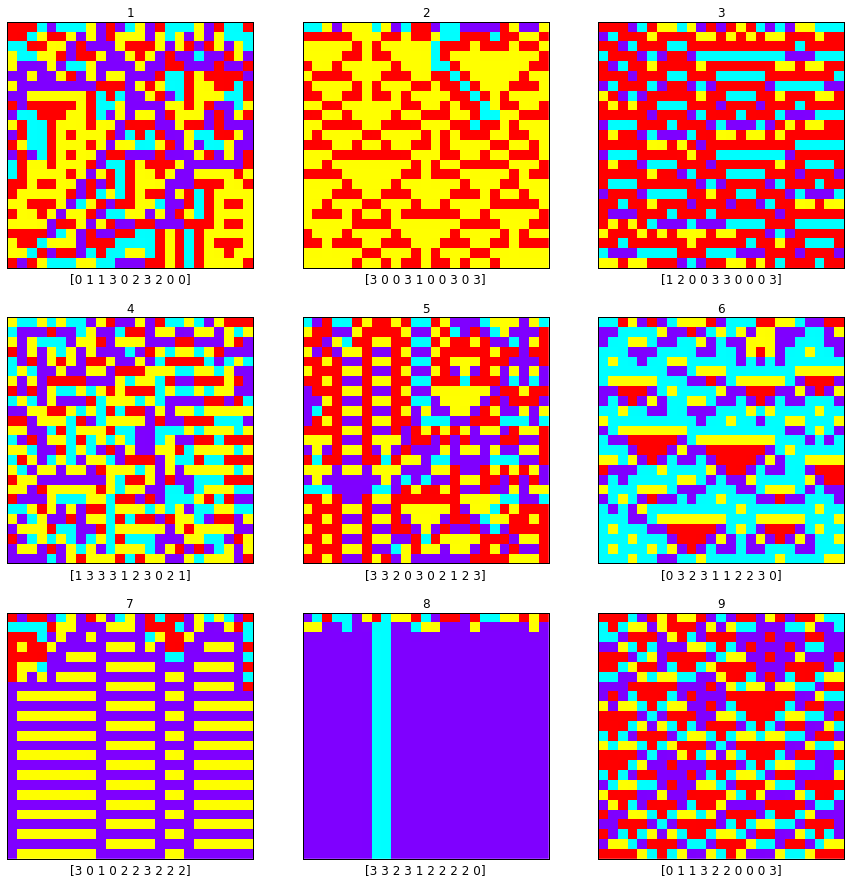

In [7]:
CellAuto()

After running the **CellAuto** function, we obtain the above images, and make the following observations:

1. Images 2, 6, and 9 all have downward pointing triangles of various sizes.  Inspection of all the rules reveals that the 1st postiton might be important since the color of the triangles is the number in index 0.  Index 5, and possibly 6, might also be important because they correspond to colors found in the background. (Note: I know the images dont have backgrounds per se, but it is easier for me to describe the most prominent color, if there is one, as the background color.)  Additionally, indices 1 through 3 might also have an influence, since all the colors in these positions make up the outline of the triangles.

2. Images 1 and 4 contain patterns with no discernable order.

3. Image 8 has an end behavior of all purple except for a cyan stripe.  Cyan replaces cell states of 1, and since there is only a single 1 present within the transition rule, the location of the 1 in index 4 must be very important.  That is, if the 1 is anywhere else, we would not get this vertical stripe.  Importance in position can also be seen in this rule because there are two 3's, but we see that the color yellow is gone by the 2nd generation.  Thus, it can be concluded that the 3's are not in an important position.

4. Image 7 has a ladder-like pattern of purple and yellow horizontal stripes.  Even though there are 0's and 1's, red and cyan are gone after several generations.  The rule sequence [...2,2,3,2,2,2] is what is most likely causing this pattern, since 2=purple and 3=yellow, and the yellow lines are surrounded by purple.

5. Image 3 has a main background color (red) with horizontal (cyan) stripes of various lengths.  In the rule, half of the numbers in the rule are 0 (0=red), so this could explain the red background.  There is only a single 1, and the position of this 1 must be important because this is what would cause the cyan stripes.  Even though there are a lot of 3's, they must not be in important positions, because the amount of yellow and purple looks almost the same, and there is only one 2 versus three 3's.

6. Image 5 has a combination of all the other images.  It has yellow downward triangles, ladder-like structures, horizontal stripes, and random patterns.  

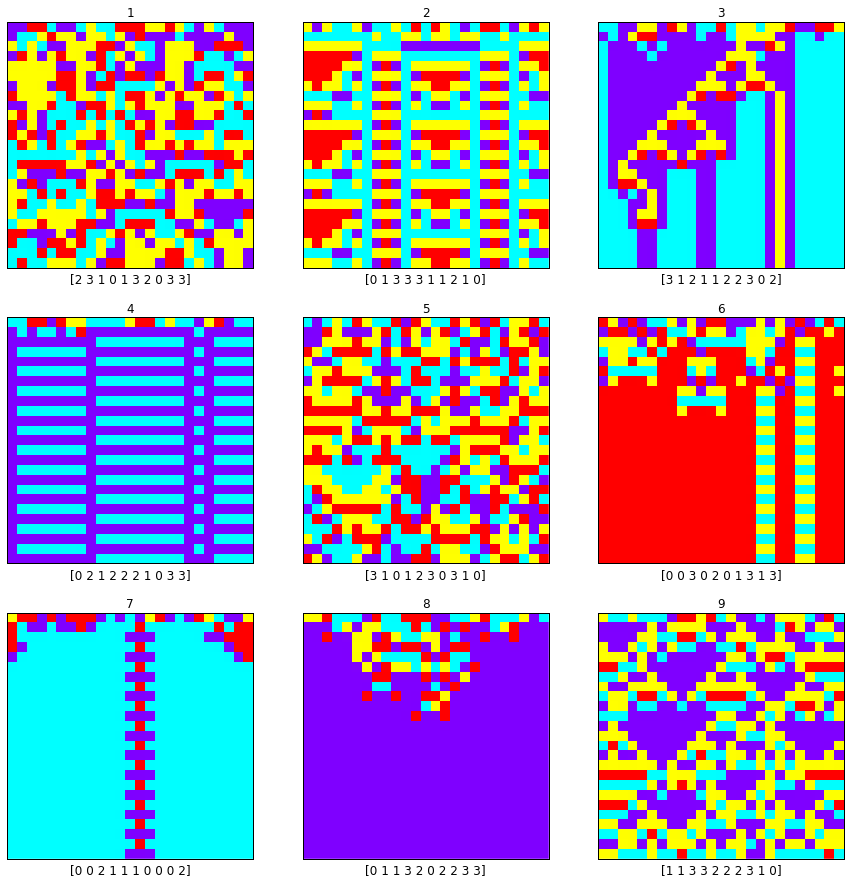

In [8]:
CellAuto()

I ran the function a second time and found the following:
(Note: when I reference the other images and their rules, I will refer to them as number # above)

1. Images 1 and 5 are like the images in number 2 above; They contain no patterns.

2. Image 8 is like the image in number 3 above (also image 8).  They both have an end behavior of one color, but this image does not have the stripe.  Index 4 in this image is 2, which is purple, and this confirms the above observation that this index is important.  In this image index 4 is the same color as the end behavior, no stripe appears, while in the other image, index 4 was 1 which was the only source of the cyan stripe.

3. Image 9 is like the images in number 1 with the triangles.  The rule upholds most of the observations made about indicies 0 through 3, but not 5 and 6 since there is not a background color.

4. I could have put image 7 in with image 8, but I felt that this type of stripe deserved its own category because it depends on multiple indices and not just index 4.  In the other 2 images, it seems that the number in indices 2 and 9 do not matter, but in this case it does because one of them must be the source of the purple.

5. Image 4 has that ladder-like pattern seen in number 4 above, but the rules do not follow the same pattern.  In this case, it seems that [...1,2,2,2,1,...] located in the middle of the array might be responsible.  In the other image, the sequence was located at the end of the array.

6. Image 2 is like number 6 above in that is has almost all of the patterns seen so far present.

7. Image 6 is another one of those with an end behavior of mostly 1 color, but in this case, there are two stripes of alternating colors.  These stripes are most likely the result of the [...1,3,1,3] sequence at the end of the rule.

8. Image 3 has several different patterns going on, but it is not like image 2.  It has 2 main colors, cyan and purple, and this could be due to the fact that the rule has mainly 1's and 2's.  Yellow is also on a diagonal and is a vertical stripe, and this could be related to the indicies of the 3's (index 0 and 7). 

### Textile Cone Pattern

The last part of the report is to try to find a rule that would produce the Textile Cone Shell shown in the picture (if you have time).  While I don't have time to actually implement the rule, I did some research and found the following:

The cellular automaton that makes this pattern is called "Rule 30" and it was introduced by Stephen Wolfram in 1983.  It is called "Rule 30" because 30 is the smallest Wolfram code that can describe the rule (Wolfram code is a code system created by him too).  "Rule 30" is also a Class 3 rule, which means that it displays chaotic and aperiodic behavior.

The rule to make the pattern depends on the current state of the cell and its neighbors on each side.  It is the following:

* Current State Pattern: 111 -> New State: 0
* Current State Pattern: 110 -> New State: 0
* Current State Pattern: 101 -> New State: 0
* Current State Pattern: 100 -> New State: 1
* Current State Pattern: 011 -> New State: 1
* Current State Pattern: 010 -> New State: 1
* Current State Pattern: 001 -> New State: 1
* Current State Pattern: 000 -> New State: 0

### Conclusion

In this report, a simple cellular automaton was created and explored.  In the automata, both the transition rule and initial state were both randomly created using the *randint* function in NumPy.  Then, the code was run twice to create 18 images with different transition rules.  The images were then grouped together by the patterns they contained, and the rules were analyzed in order to see if there were any features that led to that specific pattern.  Lastly, how to create the Textile Cone shell pattern was discussed.

### References

1. https://en.wikipedia.org/wiki/Cellular_automaton
2. http://mathworld.wolfram.com/Rule30.html
3. https://en.wikipedia.org/wiki/Rule_30